# REGRESSION WITH PYCARET and GRADIO

In [1]:
use_gpu=True

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### Installing Pycaret and Importing needed libraries

In [ ]:
pip install pycaret


In [7]:
import pandas as pd


## Importing dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
dataset = pd.read_csv('/content/drive/MyDrive/ASSIGNMENT2_AVIAJMERA/REGRESSION/insurance.csv')

## Data Description

In [8]:
dataset.shape

(1338, 7)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
dataset.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## **Pycaret Setup**

In [3]:
from pycaret.regression import *
pycaret_setup = setup(data = dataset, target = 'charges', session_id=123)

NameError: ignored

## Compare Models

In [12]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.2900
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.3730
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.4920
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.3230
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.1110
xgboost,Extreme Gradient Boosting,3443.6091,32824626.4000,5711.2140,0.7626,0.6224,0.4469,0.3440
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.1620
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0940
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,1.5080
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0950


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [13]:
best

GradientBoostingRegressor(random_state=123)

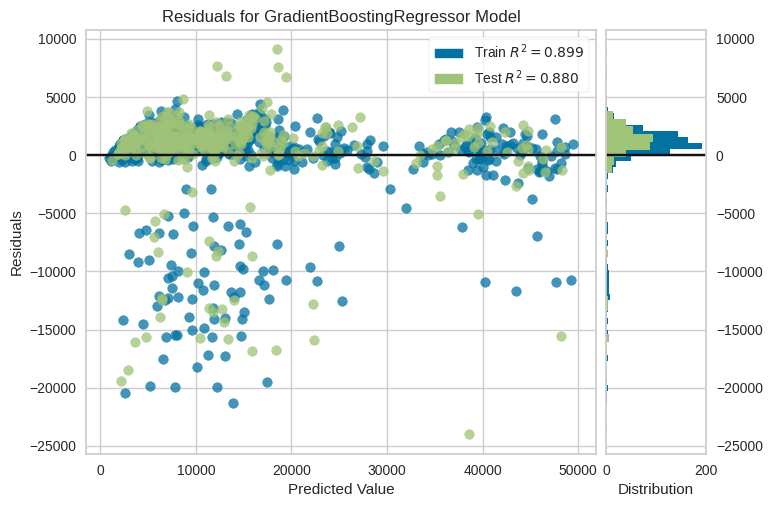

In [14]:
plot_model(best, plot = 'residuals')

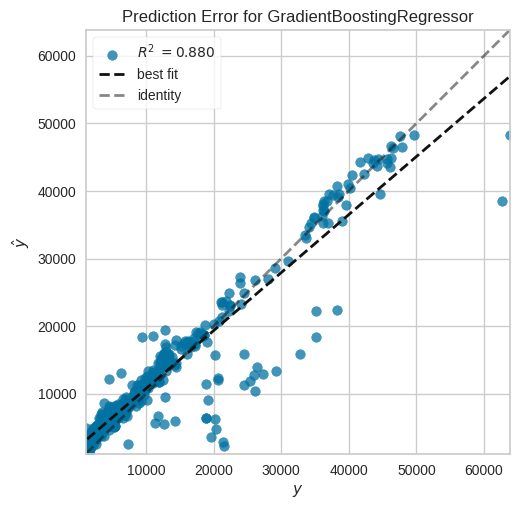

In [15]:
plot_model(best, plot = 'error')

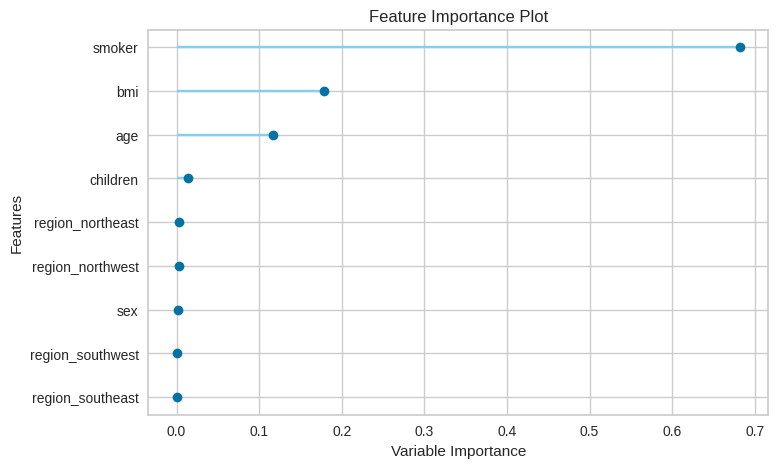

In [16]:
plot_model(best, plot = 'feature')

In [17]:
mymodel = create_model(best)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2651.0179,20312968.8483,4506.9911,0.8787,0.4506,0.3416
1,3047.5028,31789435.5754,5638.2121,0.8152,0.4560,0.2993
2,2526.0336,22219684.6628,4713.7761,0.7187,0.4909,0.3007
3,2975.2686,23090143.9001,4805.2205,0.8072,0.4866,0.3810
4,2847.7050,27163724.2109,5211.8830,0.7980,0.5103,0.3367
5,2580.5742,19052273.4486,4364.8910,0.8774,0.3340,0.2437
6,2366.1844,19241130.1230,4386.4713,0.8691,0.3504,0.2649
7,2671.5877,25501591.7592,5049.9101,0.8598,0.4414,0.2748
8,2325.6224,18564300.1288,4308.6309,0.8801,0.3889,0.2888


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
mymodel = tune_model(mymodel)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3385.2881,29805928.9322,5459.4806,0.8220,0.5659,0.4748
1,3609.4719,34095370.3511,5839.1241,0.8018,0.5114,0.4118
2,3710.7020,35878830.3015,5989.8940,0.5457,0.7977,0.5374
3,3845.1139,33132623.3741,5756.0945,0.7233,0.7606,0.5996
4,3801.3662,39868499.5152,6314.1507,0.7035,0.6453,0.4905
5,3617.8384,30867730.0487,5555.8735,0.8014,0.5108,0.3681
6,3353.2437,27372536.3200,5231.8769,0.8137,0.5943,0.4230
7,3171.2929,29781080.0403,5457.2044,0.8362,0.7103,0.3373
8,3010.7330,23908708.8446,4889.6532,0.8456,0.5965,0.5119


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
mymodel = finalize_model(mymodel)

In [20]:
save_model(mymodel,'regress')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

In [21]:
load_model('regress')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

In [ ]:
pip install gradio

In [ ]:

pip install pycaret[mlops]

In [24]:
create_app(mymodel)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

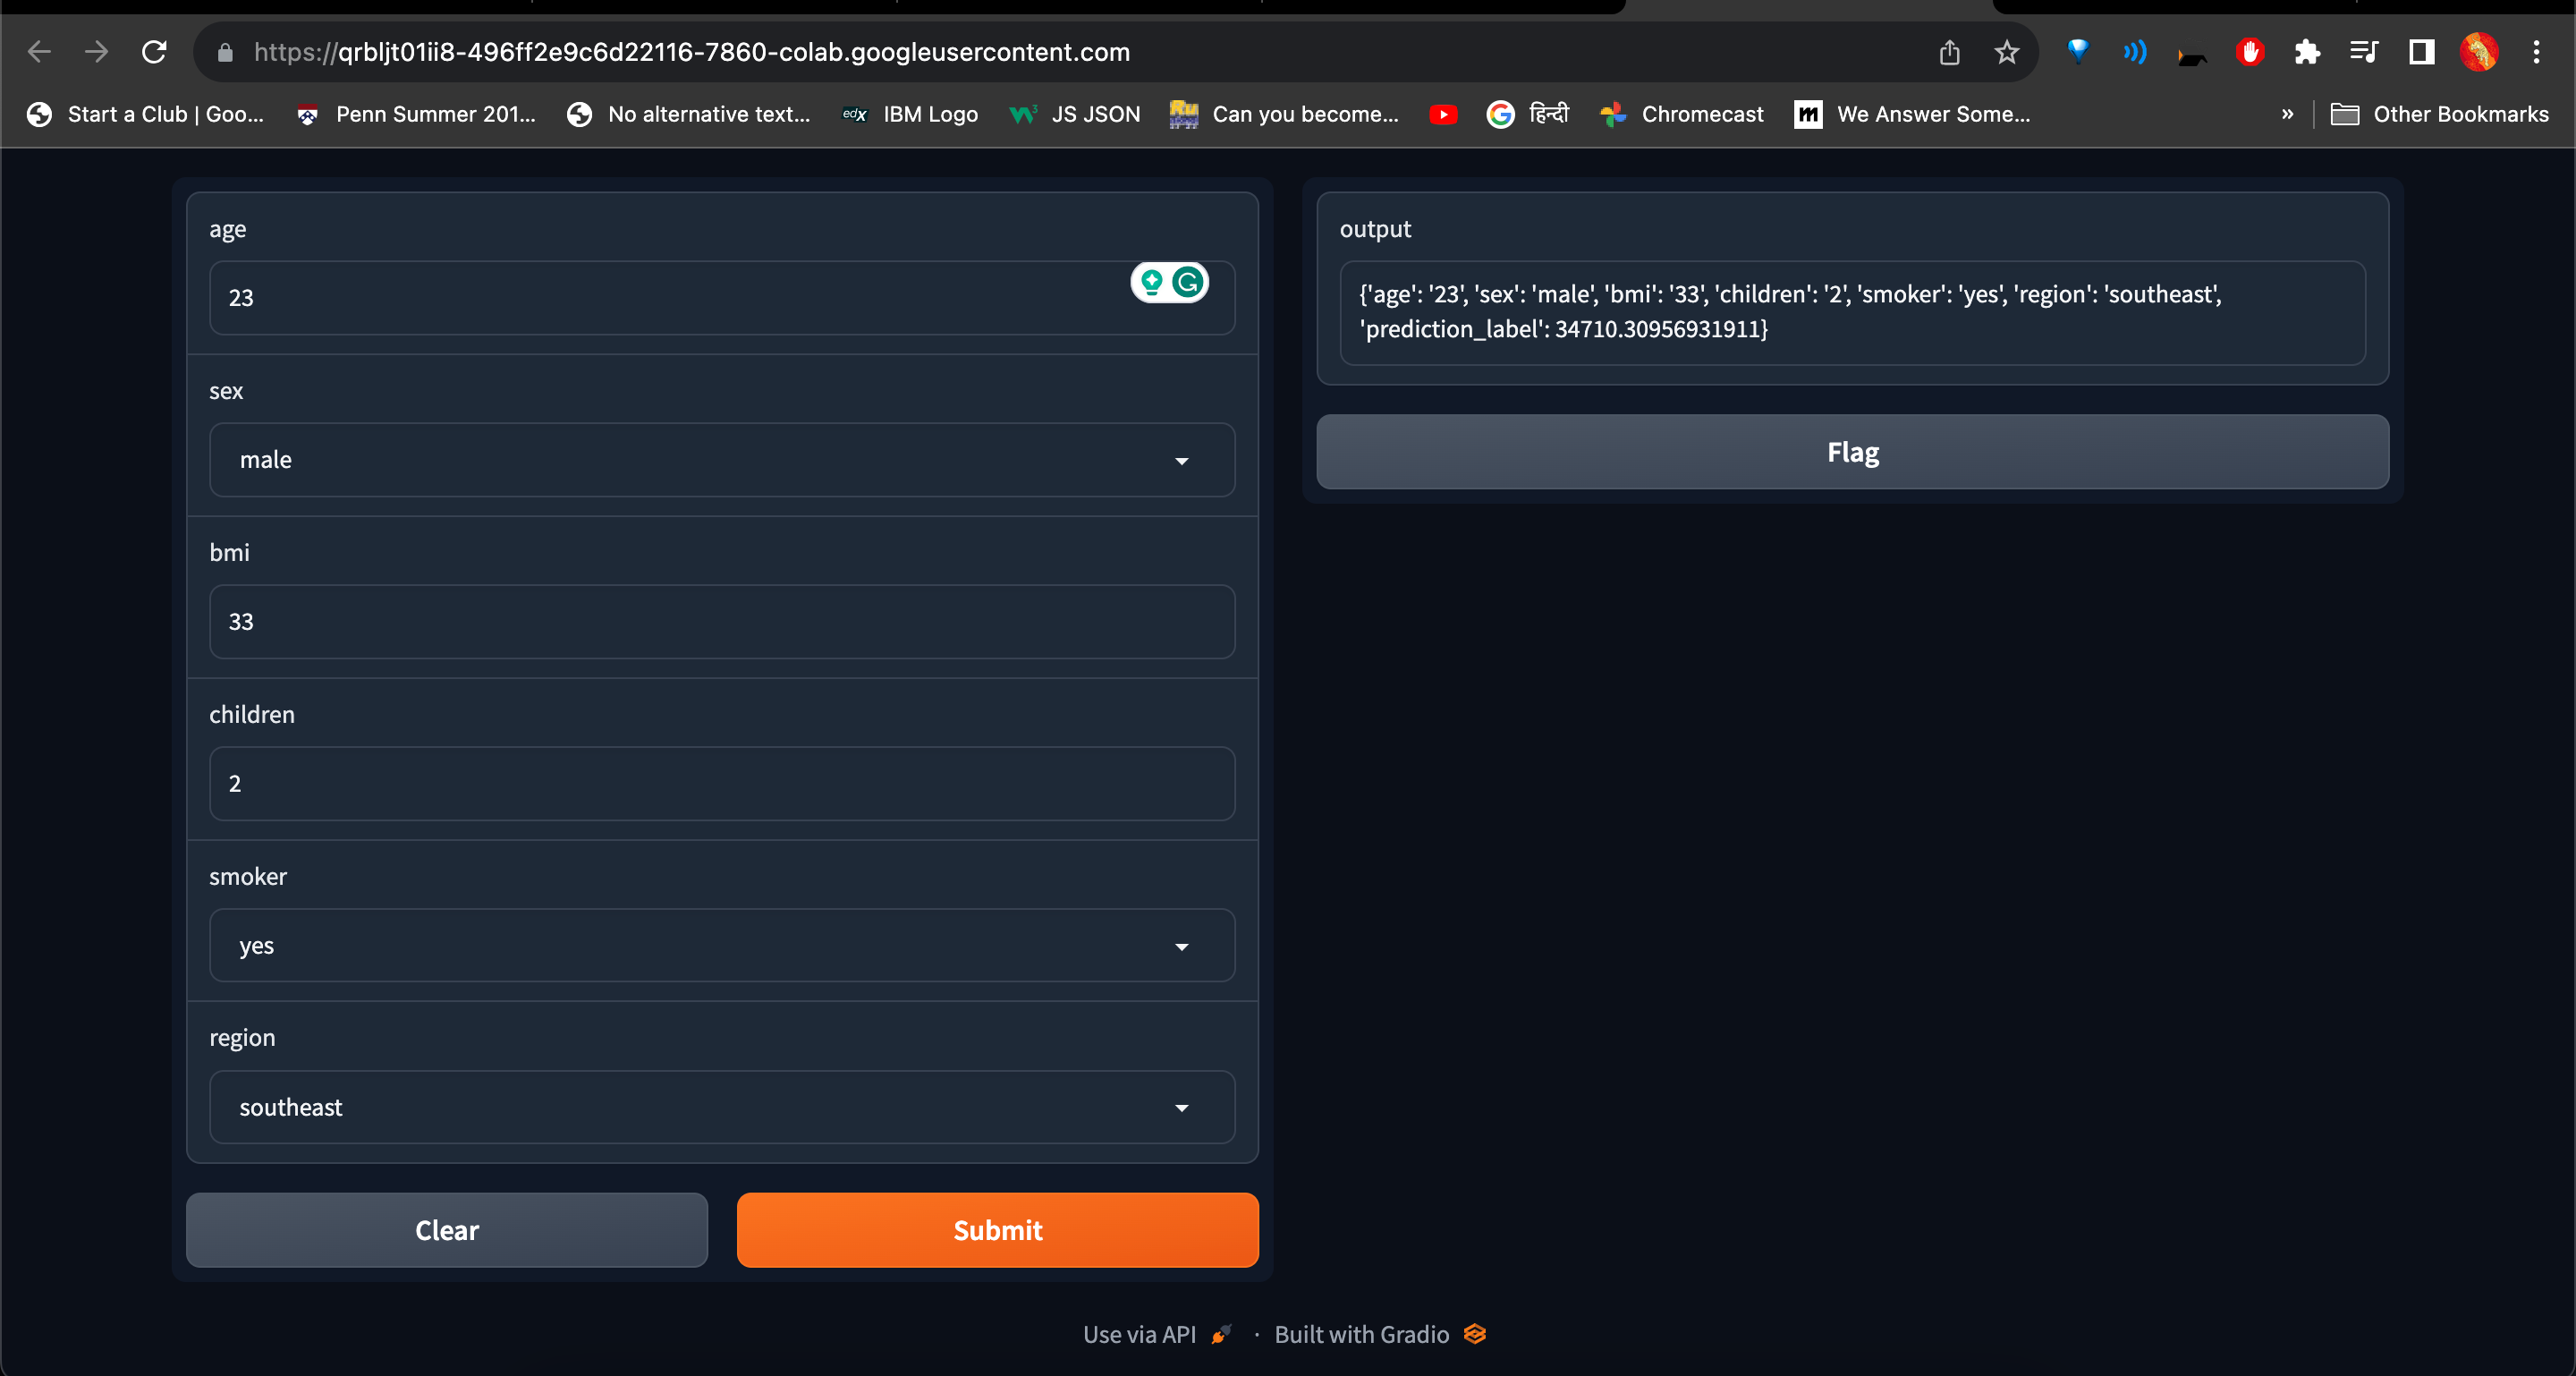
